In [1]:
import pandas as pd
import numpy as np
import re
import sys
sys.path.append('Clinton-Trump_Corpus/Clinton/')
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt
%matplotlib inline
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from collections import defaultdict
from nltk.corpus import stopwords
import string
from sklearn.linear_model import LinearRegression

In [2]:
trump_pattern = re.compile(r'<TRUMP:>.*<')
clinton_pattern = re.compile(r'<CLINTON:>.*<')

In [3]:
def convertToList(lst): 
    return (lst.split())

In [4]:
# Function to convert list into single string
def listToString(d):  
    
    # initialize empty string 
    new = ""  
    
    # iterate through list 
    for item in d:  
        new += (str(item) + ' ')   
        
    return new 

In [79]:
def parse_file(filepath, pattern):

    data = []  # create an empty list to collect the data
    # open the file and read through it line by line
    with open(filepath, 'r') as f:
        fullText = f.read()
    text_list = re.findall(pattern, fullText)
    text = listToString(text_list)
    text = text.replace('\'', '')
    text = text.replace('-', '')
    text = text.replace('.', '')
    stop_words = set(stopwords.words('english'))
    added_stopwords = ['<', '>', 'applause', '.', ',', ';', ':', '--', '\'', '?', '$', '`', '``', '\'\'', '...', 'cheers', 'clinton', 'trump']
    stop_words |= set(added_stopwords)
    word_tokens = word_tokenize(text.lower())
    cleaned_text = [word for word in word_tokens if word not in stop_words]
    final_text = listToString(cleaned_text)

    return final_text

In [80]:
filepath = 'C:/Users/isstevens/Documents/fern_house/nlp/Clinton-Trump_Corpus/Trump/Trump_2016-07-22.txt'
data = parse_file(filepath, trump_pattern)
print(data)

thank much amazing convention one best think one best ever terms terms enthusiasm terms think represents getting word ivanka incredible last night incredible job many speakers amazing groundsetting mean really groundsetting something special even getting good marks television believe hard believe oh theyll change dont worry laughter incredible four days want thank people cleveland people ohio mean theyve done know read two three weeks ago going horrible going riots going problems everything problem problem probably one peaceful one beautiful one lovefilled conventions history conventions talk unity want tell unity unity right saw last night unity amazing party come together party come together people arent ok know youve got understand ran outsider didnt want anybody guys like mike pence mean isnt supposed happen see dont win im going blame mike right blame mike laughter want thank number people particular going leave always happens sad set im real estate guy build buildings build thing

In [81]:
clinton_text = []

for file in os.listdir('C:/Users/isstevens/Documents/fern_house/nlp/Clinton-Trump_Corpus/Clinton'):
    f = os.path.join("Clinton-Trump_Corpus/Clinton/", file)
    parsed_text = parse_file(f, clinton_pattern)
    clinton_text.append(parsed_text)

In [82]:
trump_text = []

for file in os.listdir('C:/Users/isstevens/Documents/fern_house/nlp/Clinton-Trump_Corpus/Trump'):
    f = os.path.join("Clinton-Trump_Corpus/Trump/", file)
    parsed_text = parse_file(f, trump_pattern)
    trump_text.append(parsed_text)

In [83]:
fullClinton_list = [word for line in clinton_text for word in line.split()]
fullTrump_list = [word for line in trump_text for word in line.split()]

In [84]:
clintonDict = defaultdict(int)
for w in fullClinton_list:
    clintonDict[w] += 1
trumpDict = defaultdict(int)
for w in fullTrump_list:
    trumpDict[w] += 1

In [85]:
print(clintonDict['thank'])
print(trumpDict['thank'])

176
787


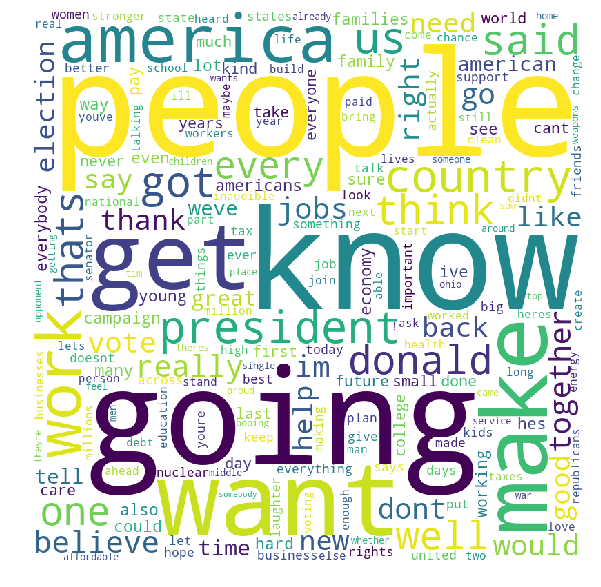

In [86]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(frequencies=clintonDict) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

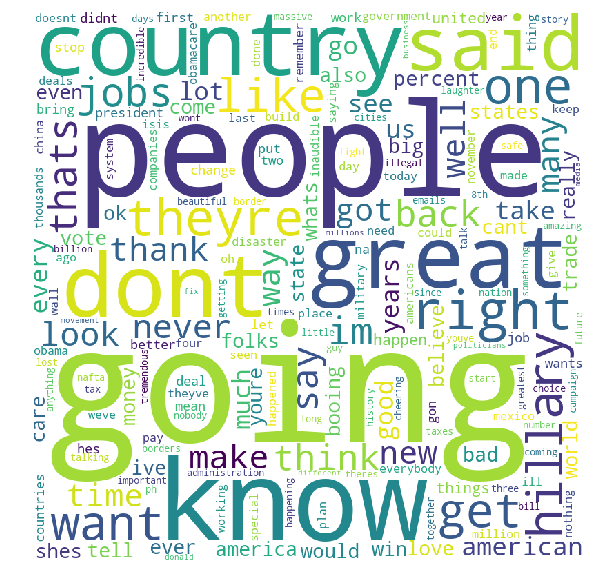

In [87]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(frequencies=trumpDict) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [88]:
clintonDF = pd.DataFrame(columns = ['Text', 'Label'])
clintonDF['Text'] = clinton_text
clintonDF['Label'] = 1
clintonDF.insert
print(clintonDF.head(10))

                                                Text  Label
0  thank thank much thank thank much thank ! than...      1
1  hello thank whoa thank much thank thank much b...      1
2  convention starting friday morning tim kaine w...      1
3  good morning pleased want thank invitation int...      1
4  happy back chance talk introduced two people a...      1
5  thank thank much tell thrilled number reasons ...      1
6  hello thank thank much great back scranton pen...      1
7  hello philadelphia wow thank thank thank much ...      1
8  hello thank thank much wow oh happy great clev...      1
9  past week guise outreach africanamericans stoo...      1


In [89]:
trumpDF = pd.DataFrame(columns = ['Text', 'Label'])
trumpDF['Text'] = trump_text
trumpDF['Label'] = 0
print(trumpDF.head(10))

                                                Text  Label
0  thank much amazing convention one best think o...      0
1  thank mike thank everybody inaudible thank eve...      0
2  thank much everybody wow thank thank much priv...      0
3  said person sitting watching television ive sa...      0
4  thank whoa whoa amazing amazing usa thank than...      0
5  thank thank thank much thank much tell fire ma...      0
6  thank tremendous crowds people outside would a...      0
7  want tell happen truly great governor said som...      0
8  good good special special special man special ...      0
9  thank everybody thank much thank crowd beautif...      0


In [90]:
frames = [clintonDF, trumpDF]
allDF = pd.concat(frames)
allDF = allDF.sample(frac=1).reset_index(drop=True)
print(allDF.head(10))

                                                Text  Label
0  thank going win ohio doubt know want start tha...      0
1  thank thank much thank thank much thank ! than...      1
2  thank thank love sign blacks love sign thank l...      0
3  wow ! thank much ! thank beautiful night great...      1
4  thank thank thank much thank much tell fire ma...      0
5  good afternoon delighted great honor opportuni...      1
6  thank thank thank love big ben big bens friend...      0
7  thank beautiful crowd thank thank group thank ...      0
8  want tell happen truly great governor said som...      0
9  thank thank everybody thank unbelievable thank...      0


In [91]:
vectorizer = TfidfVectorizer()
text = allDF['Text']
train_X = vectorizer.fit_transform(text)
P = vectorizer.get_feature_names()
class_labels = allDF['Label']
print(P)

['00', '000', '000page', '015', '055', '06', '08', '09', '10', '100', '100th', '101', '102', '102030', '104', '109', '10point', '10step', '10year', '11', '110', '112', '113', '115', '116', '117', '11th', '11yearold', '12', '120', '123', '125', '12th', '12yearold', '13', '130', '135', '14', '1400', '140character', '143', '145', '148', '14th', '14year', '14yearold', '15', '150', '151', '154', '155', '156', '15minute', '15th', '16', '160', '161', '166', '169', '16th', '17', '17yearold', '17years', '18', '180', '1800', '182', '1835', '18minute', '18month', '19', '1900', '1915', '1917', '1928', '1929', '1939', '1940', '1940s', '1947', '1950s', '1954', '1965', '1973', '1980', '1987', '1990', '1990s', '1992', '1993', '1997', '19th', '1st', '20', '200', '2000', '2001', '2003', '2004', '2006', '2007', '2008', '2009', '2009s', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '202', '2020', '2030', '20th', '20yearold', '21', '213', '21st', '21yearold', '22', '220', '225', '

In [92]:
cv = CountVectorizer()
cv.fit(text)
X_train = cv.transform(text)
svm = LinearSVC()
svm.fit(X_train, class_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [93]:
model = LinearSVC(C=1)
model.fit(train_X, class_labels)
model_1 = LinearRegression()
model_1.fit(train_X, class_labels)
features = list(zip(P, model_1.coef_))
featuresDict = dict(zip(P, model_1.coef_))

In [94]:
sort_features = sorted(features, key=lambda x: x[1])
print(sort_features[:4])
print(sort_features[-4:])

[('hillary', -0.39971201943044576), ('theyre', -0.26524898764072824), ('going', -0.2563095860490768), ('great', -0.240046780143223)]
[('president', 0.29224798702727695), ('election', 0.3040575268213295), ('america', 0.32102337243005374), ('donald', 0.33228544515006436)]


In [95]:
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

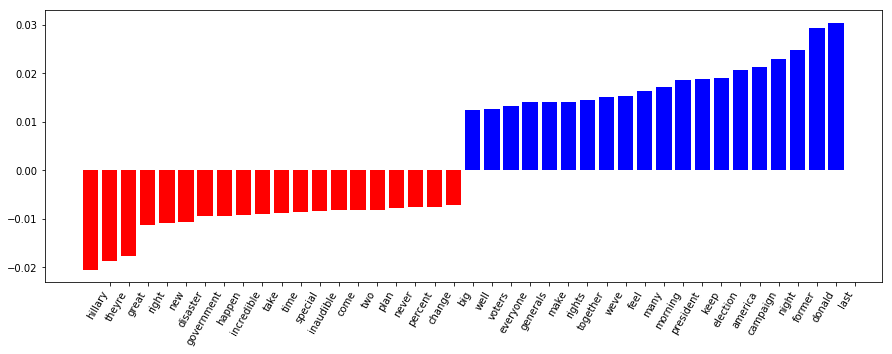

In [96]:
plot_coefficients(svm, cv.get_feature_names())